In [1]:
import pandas as pd 
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [435]:
def with_hue(plot, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in plot.patches]
    patch = [p for p in plot.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            percentage = '{:.1f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - 0.15
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 
            ax.annotate(percentage, (x, y), size = 12)
    plt.show()

def without_hue(plot, feature):
    total = len(feature)
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
    plt.show()

In [36]:
df=pd.read_csv('C:/Users/djroc/Dropbox/My PC (LAPTOP-8JC4NERN)/Downloads/TITANIC.csv')

In [3]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Fare      891 non-null    float64
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [37]:
df.drop(['PassengerId','Cabin','Ticket'],inplace=True,axis=1)

In [38]:
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

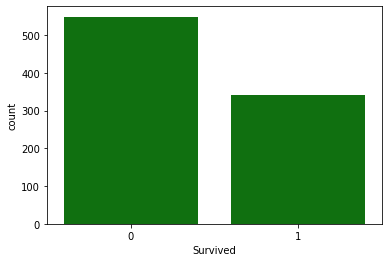

In [18]:
#dataset seems to be balanced so ther is no need of undersamplinmg it.
sn.countplot(x='Survived',data=df,color='green')

In [8]:
for feature in df.columns:
    print("{}:{}".format(feature,len(df[feature].unique())))

Survived:2
Pclass:3
Name:891
Sex:2
Age:89
SibSp:7
Parch:7
Fare:248
Embarked:4


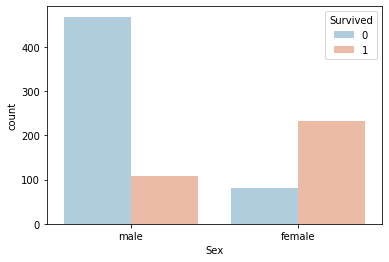

In [28]:
#It seems that female passengers were given more priority and so have survived more than male
#large number of male have died in propotion to number of male survived
sn.countplot(x='Sex',hue='Survived',data=df,color='orange',palette='RdBu_r')

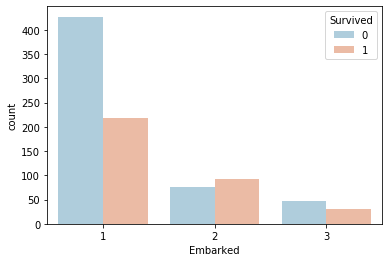

In [342]:
sn.countplot(x='Embarked',hue='Survived',data=df,color='orange',palette='RdBu_r')

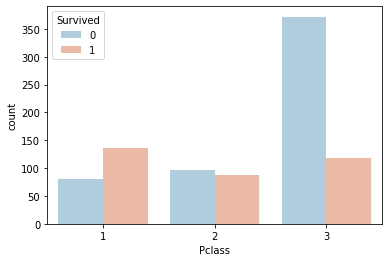

In [344]:
sn.countplot(x='Pclass',,hue='Survived',data=df,color='orange',palette='RdBu_r')

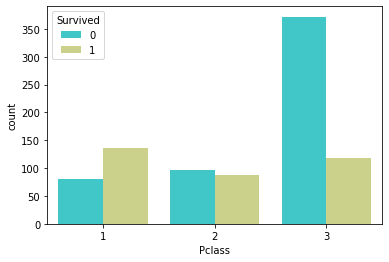

In [33]:
#It seems that 1 class passenger have survived the most and then 3 and then 2
#possible reason for 3 class passenger being less survived than 2 class passenger could be that most of the 3 class passenger be female
sn.countplot(x='Pclass',hue='Survived',data=df,color='orange',palette='rainbow')

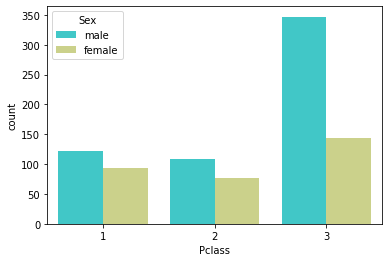

In [32]:
#it seems that 3 class passengers are having more female than other classes
sn.countplot(x='Pclass',hue='Sex',data=df,color='orange',palette='rainbow')

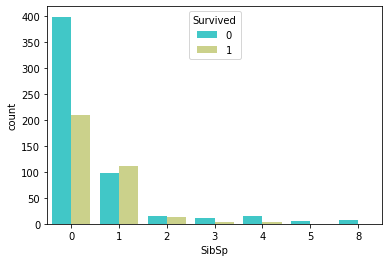

In [41]:
sn.countplot(x='SibSp',hue='Survived',data=df,palette='rainbow')

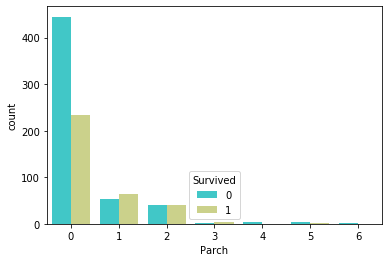

In [44]:
sn.countplot(x='Parch',hue='Survived',data=df,palette='rainbow')

Text(0.5, 1.0, 'survive=0')

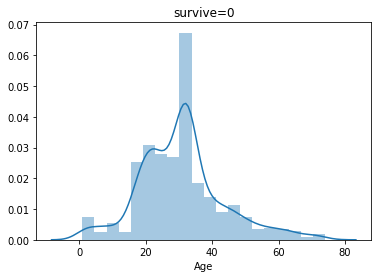

In [65]:
sn.distplot(df[df['Survived']==0].Age.dropna(),bins=20)
plt.title('survive=0')

Text(0.5, 1.0, 'survive=1')

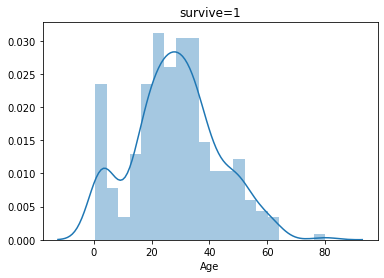

In [8]:
sn.distplot(df[df['Survived']==1].Age.dropna(),bins=20)
plt.title('survive=1')

Text(0.5, 1.0, 'Female')

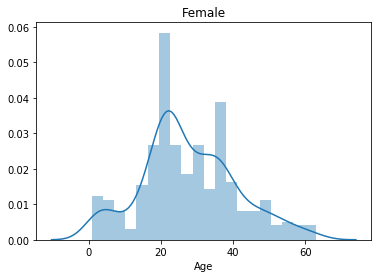

In [21]:
sn.distplot(df[df['Sex']==0].Age.dropna(),bins=20)
plt.title('Female')

Text(0.5, 1.0, 'Male')

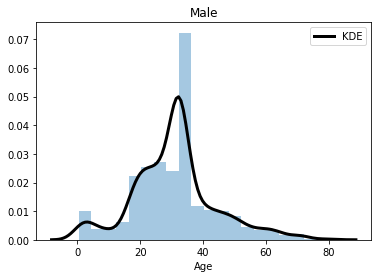

In [25]:
sn.distplot(df[df['Sex']==1].Age.dropna(),bins=20,kde_kws={"color": "k", "lw": 3, "label": "KDE"},)
plt.title('Male')

C:\Users\djroc\anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


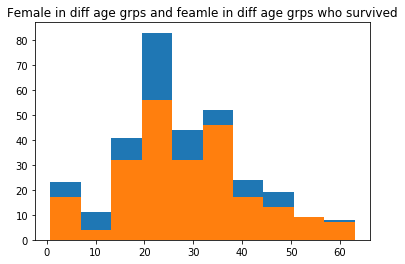

In [86]:
#priority-50-55,57-63,33-37,37-44=1-8,44-51,7-12,13-18,26-32,19-25
#51-63(old)>7-18(children or teenagers)>33-51>19-32(young people)
plt.hist(df[df['Sex']==0].Age.dropna())
plt.hist(df[df['Survived']==1][df['Sex']==0].Age)
plt.title('Female in diff age grps and feamle in diff age grps who survived')
plt.show()

C:\Users\djroc\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


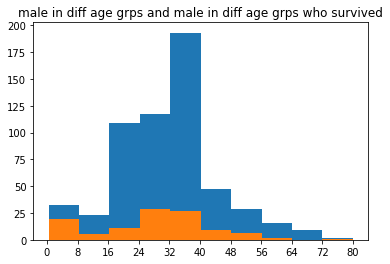

In [431]:
#Highest males are in age group 33-40 then 18-32 then 40-47 then 0-8 and then old people and children in age group 9-18
#male children in range 0-9 and extremely old people in range 72-80 were given more priority
plt.hist(df[df['Sex']==1].Age.dropna(),bins=10)
plt.title('Male in diff age grps ')
plt.hist(df[df['Survived']==1][df['Sex']==1].Age)
plt.title('male in diff age grps and male in diff age grps who survived')
plt.xticks(np.arange(0,85,8))
plt.show()

In [ ]:
plt.hist(df[df['Sex']==0].Age.dropna())
plt.hist(df[df['Survived']==1][df['Sex']==0].Age)
plt.title('Female in diff age grps and feamle in diff age grps who survived')
plt.show()

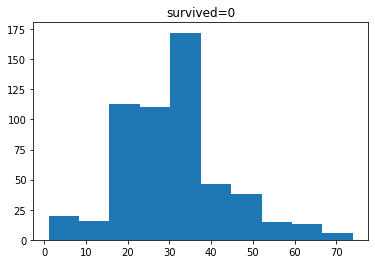

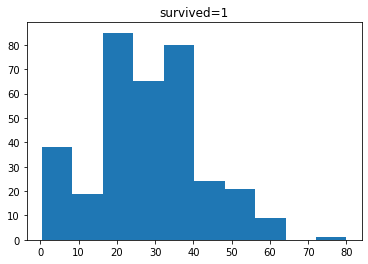

In [72]:
#children in age grp(1-9) and people in age grp(18-40) have survived more
plt.hist(df[df['Survived']==0].Age.dropna(),bins=10)
plt.title('survived=0')
plt.show()
plt.hist(df[df['Survived']==1].Age.dropna(),bins=10)
plt.title('survived=1')
plt.show()

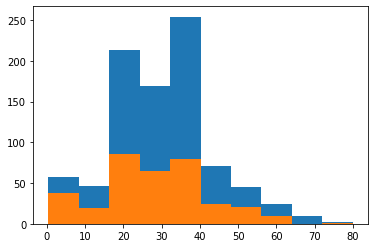

In [180]:
plt.hist(df.Age.dropna(),bins=10)
plt.hist(df[df['Survived']==1].Age.dropna(),bins=10)
plt.show()

In [199]:
x=(((df[df['Age']>=0][df['Survived']==1].Age.count())-(df[df['Age']>=8][df['Survived']==1].Age.count()))/((df[df['Age']>=0].Age.count())-(df[df['Age']>=8].Age.count())))*100
print(x)
x=(((df[df['Age']>=8][df['Survived']==1].Age.count())-(df[df['Age']>=17][df['Survived']==1].Age.count()))/((df[df['Age']>=8].Age.count())-(df[df['Age']>=17].Age.count())))*100
print(x)
x=(((df[df['Age']>=17][df['Survived']==1].Age.count())-(df[df['Age']>=24][df['Survived']==1].Age.count()))/((df[df['Age']>=17].Age.count())-(df[df['Age']>=24].Age.count())))*100
print(x)
x=(((df[df['Age']>=25][df['Survived']==1].Age.count())-(df[df['Age']>=32][df['Survived']==1].Age.count()))/((df[df['Age']>=25].Age.count())-(df[df['Age']>=32].Age.count())))*100
print(x)
x=(((df[df['Age']>=33][df['Survived']==1].Age.count())-(df[df['Age']>=40][df['Survived']==1].Age.count()))/((df[df['Age']>=33].Age.count())-(df[df['Age']>=39].Age.count())))*100
print(x)
x=(((df[df['Age']>40][df['Survived']==1].Age.count())-(df[df['Age']>=48][df['Survived']==1].Age.count()))/((df[df['Age']>40].Age.count())-(df[df['Age']>=48].Age.count())))*100
print(x)
x=(((df[df['Age']>=49][df['Survived']==1].Age.count())-(df[df['Age']>=56][df['Survived']==1].Age.count()))/((df[df['Age']>=49].Age.count())-(df[df['Age']>=56].Age.count())))*100
print(x)
x=(((df[df['Age']>=57][df['Survived']==1].Age.count())-(df[df['Age']>=62][df['Survived']==1].Age.count()))/((df[df['Age']>=57].Age.count())-(df[df['Age']>=62].Age.count())))*100
print(x)
x=(((df[df['Age']>=63][df['Survived']==1].Age.count())-(df[df['Age']>=71][df['Survived']==1].Age.count()))/((df[df['Age']>=63].Age.count())-(df[df['Age']>=71].Age.count())))*100
print(x)
x=(((df[df['Age']>=72][df['Survived']==1].Age.count())-(df[df['Age']>80][df['Survived']==1].Age.count()))/((df[df['Age']>=72].Age.count())-(df[df['Age']>80].Age.count())))*100
print(x)

66.66666666666666
42.0
38.25136612021858
37.333333333333336
55.660377358490564
29.03225806451613
46.34146341463415
31.25
18.181818181818183
50.0


C:\Users\djroc\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\Users\djroc\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\djroc\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\djroc\anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\djroc\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\Users\djroc\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key

In [201]:
x=(((df[df['Age']>=0][df['Survived']==1].Age.count())-(df[df['Age']>=20][df['Survived']==1].Age.count()))/((df[df['Age']>=0].Age.count())-(df[df['Age']>=20].Age.count())))*100
print(x)
x=(((df[df['Age']>=21][df['Survived']==1].Age.count())-(df[df['Age']>40][df['Survived']==1].Age.count()))/((df[df['Age']>=21].Age.count())-(df[df['Age']>=40].Age.count())))*100
print(x)
x=(((df[df['Age']>=41][df['Survived']==1].Age.count())-(df[df['Age']>60][df['Survived']==1].Age.count()))/((df[df['Age']>=41].Age.count())-(df[df['Age']>=60].Age.count())))*100
print(x)

48.214285714285715
37.38489871086556
40.65040650406504


C:\Users\djroc\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\Users\djroc\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\djroc\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


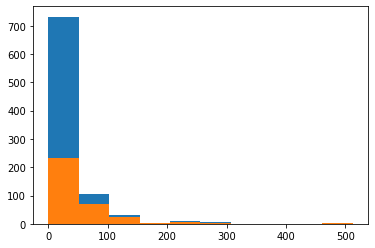

In [269]:
#It seems survival rate for % of people who gave more fare is high.
plt.hist(df.Fare)
plt.hist(df[df['Survived']==1].Fare)
plt.show()

(array([38., 19., 85., 65., 80., 24., 21.,  9.,  0.,  1.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <a list of 10 Patch objects>)

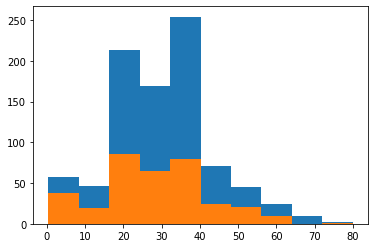

In [170]:
plt.hist(df.Age.dropna(),bins=10)
plt.hist(df[df['Survived']==1].Age.dropna(),bins=10)

In [191]:
df.Sex.count()

891

In [9]:
df.Embarked.mode()

0    S
dtype: object

In [42]:
df['Embarked'].fillna(value='S',inplace=True)

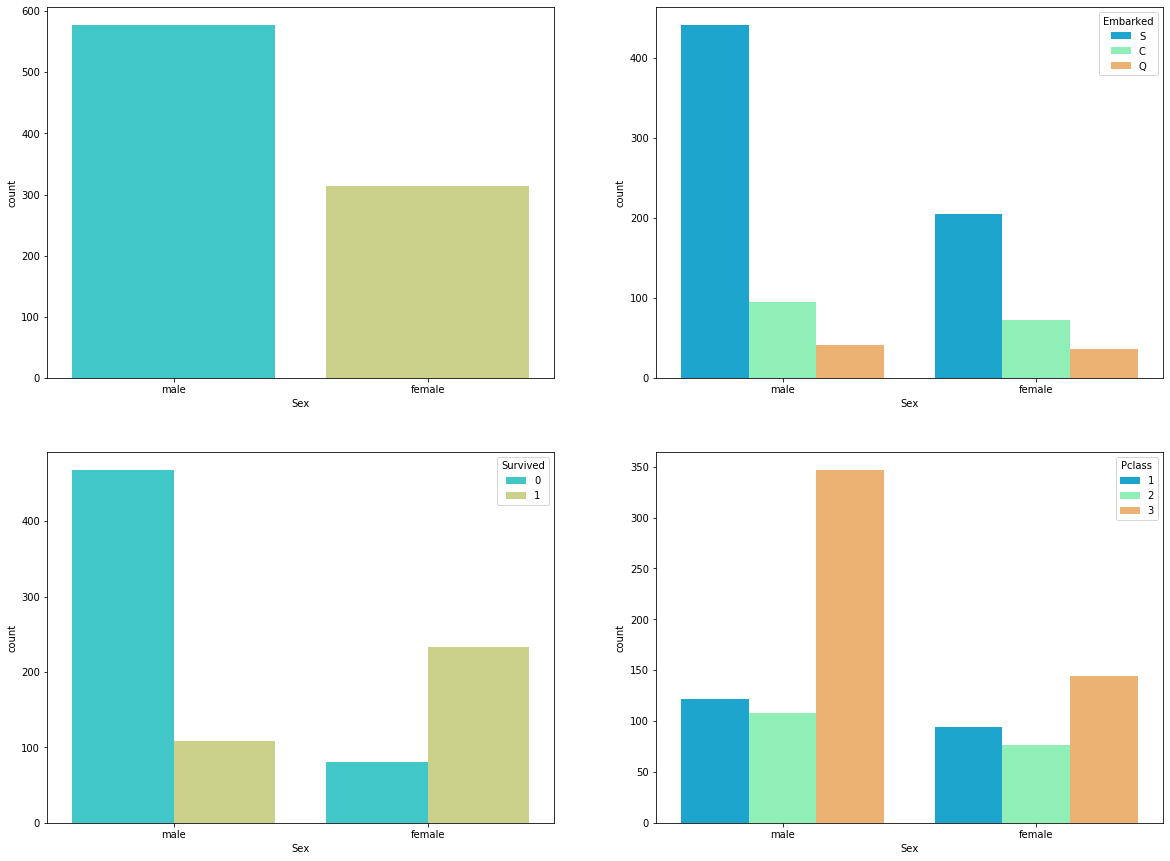

In [107]:
#No of female survived are more than men an so we infer that female are given more priority than men.
f,ax=plt.subplots(nrows=2,ncols=2,figsize=(20,15))
sn.countplot(x='Sex',ax=ax[0,0],data=df,palette='rainbow')
sn.countplot(x='Sex',hue='Embarked',ax=ax[0,1],data=df,palette='rainbow')
sn.countplot(x='Sex',hue='Survived',ax=ax[1,0],data=df,palette='rainbow')
sn.countplot(x='Sex',hue='Pclass',ax=ax[1,1],data=df,palette='rainbow')
plt.show()

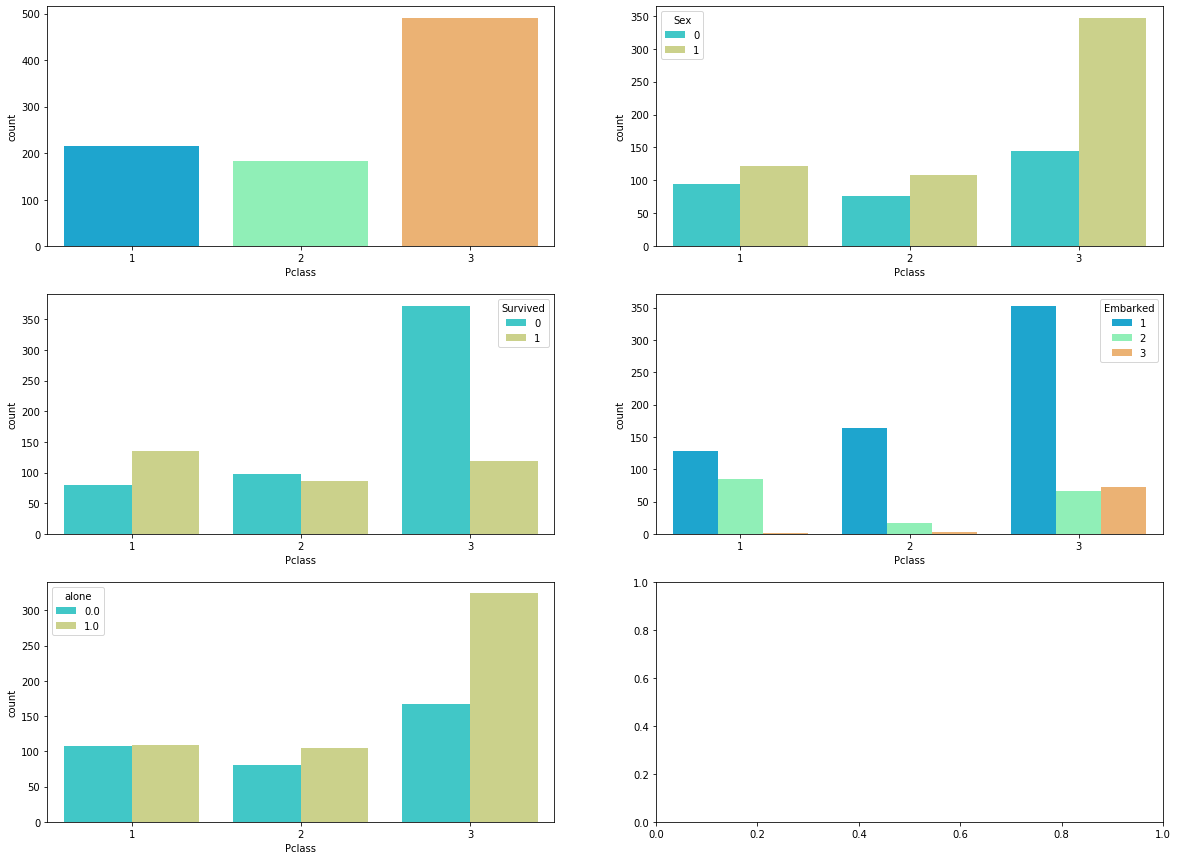

In [271]:
#No. of 1st class passenger have survived more than 2nd class and 2nd class more than 3rd class,so the 1st class people were given more priority than 2nd class and 2nd class more than 3rd class in being rescued
f,ax=plt.subplots(nrows=3,ncols=2,figsize=(20,15))
sn.countplot(x='Pclass',ax=ax[0,0],data=df,palette='rainbow')
sn.countplot(x='Pclass',hue='Sex',ax=ax[0,1],data=df,palette='rainbow')
sn.countplot(x='Pclass',hue='Survived',ax=ax[1,0],data=df,palette='rainbow')
sn.countplot(x='Pclass',hue='Embarked',ax=ax[1,1],data=df,palette='rainbow')
sn.countplot(x='Pclass',hue='alone',ax=ax[2,0],data=df,palette='rainbow')
plt.show()

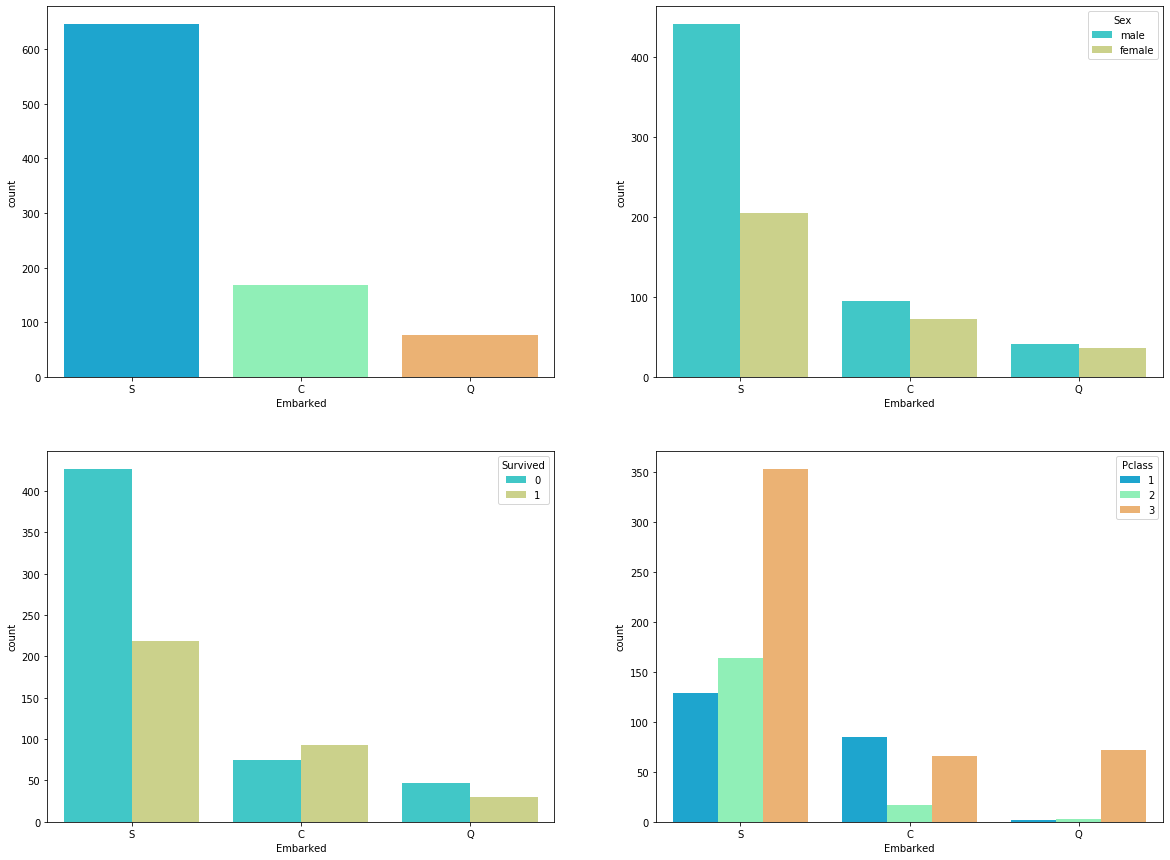

In [94]:
#People who embarked from C survived more than Q and those from Q survived more than C,so we infer may be port C may bear than Q and Q may be nea
f,ax=plt.subplots(nrows=2,ncols=2,figsize=(20,15))
sn.countplot(x='Embarked',ax=ax[0,0],data=df,palette='rainbow')
sn.countplot(x='Embarked',hue='Sex',ax=ax[0,1],data=df,palette='rainbow',)
sn.countplot(x='Embarked',hue='Survived',ax=ax[1,0],data=df,palette='rainbow')
sn.countplot(x='Embarked',hue='Pclass',ax=ax[1,1],data=df,palette='rainbow')
plt.show()

In [353]:
df[df['Embarked']==2][df['Sex']==0].Embarked.count()

C:\Users\djroc\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


73

In [372]:
df[df['Embarked']==1][df['Sex']==0][df['Pclass']==2].Embarked.count()

C:\Users\djroc\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


67

In [104]:
len(df[df['Embarked']=='C'][df['Sex']=='female'][df['Survived']==0])

C:\Users\djroc\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


9

In [103]:
len(df[df['Embarked']=='C'][df['Sex']=='male'][df['Survived']==0])

C:\Users\djroc\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


66

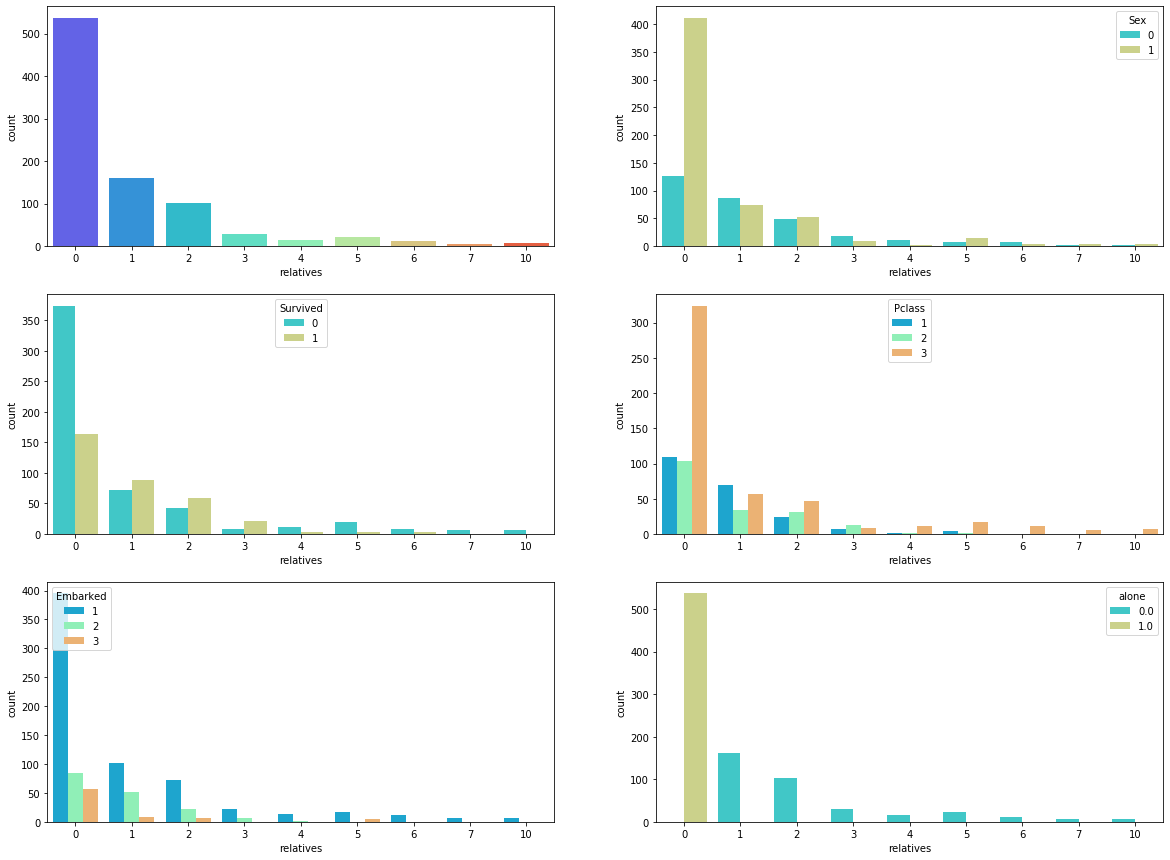

In [270]:
#people having 1 parent or child survived more than people with 2 and people with 2 parnt or child survived more than alone people
f,ax=plt.subplots(nrows=3,ncols=2,figsize=(20,15))
sn.countplot(x='relatives',ax=ax[0,0],data=df,palette='rainbow')
sn.countplot(x='relatives',hue='Sex',ax=ax[0,1],data=df,palette='rainbow')
sn.countplot(x='relatives',hue='Survived',ax=ax[1,0],data=df,palette='rainbow')
sn.countplot(x='relatives',hue='Pclass',ax=ax[1,1],data=df,palette='rainbow')
sn.countplot(x='relatives',hue='Embarked',ax=ax[2,0],data=df,palette='rainbow')
sn.countplot(x='relatives',hue='Embarked',ax=ax[2,0],data=df,palette='rainbow')
plt.show()

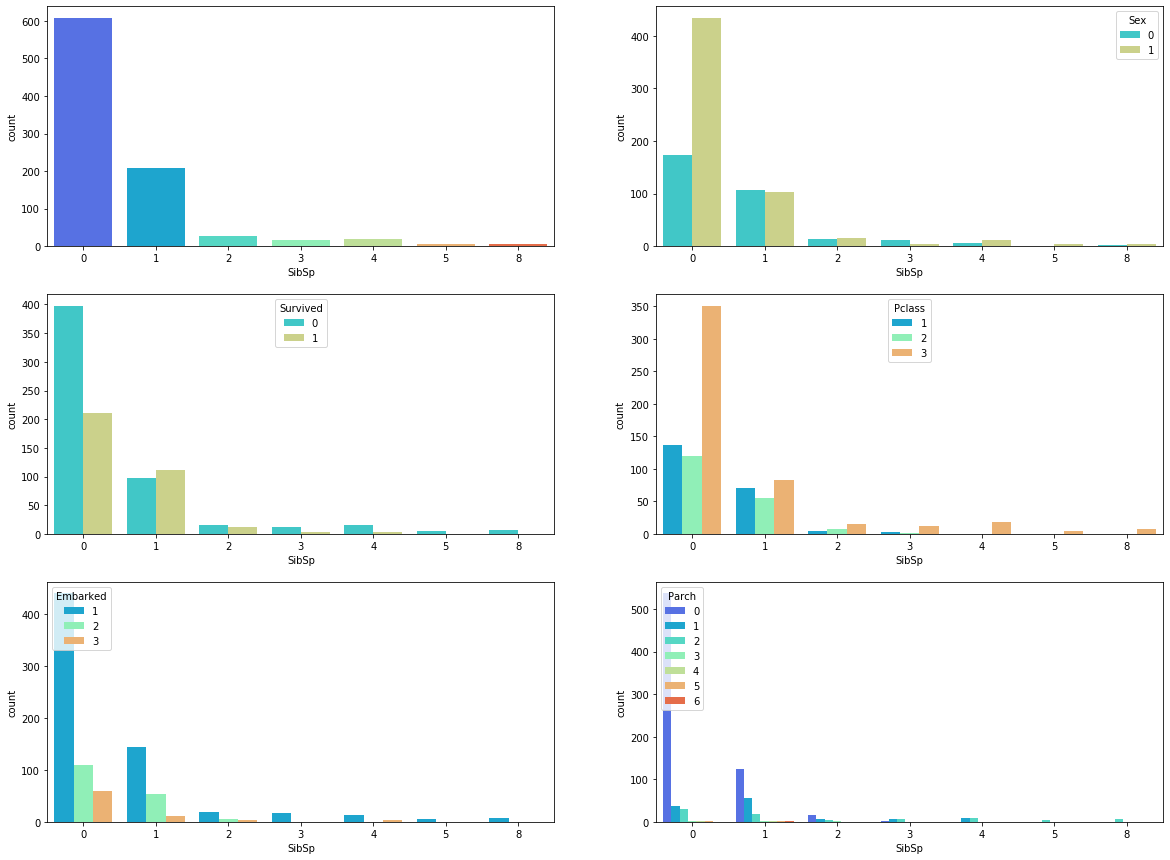

In [26]:
#people with sibsp 1 and then 2 have survived more than people with 0 sibsp and others with more than 2 sibsp
f,ax=plt.subplots(nrows=3,ncols=2,figsize=(20,15))
sn.countplot(x='SibSp',ax=ax[0,0],data=df,palette='rainbow')
sn.countplot(x='SibSp',hue='Sex',ax=ax[0,1],data=df,palette='rainbow')
sn.countplot(x='SibSp',hue='Survived',ax=ax[1,0],data=df,palette='rainbow')
sn.countplot(x='SibSp',hue='Pclass',ax=ax[1,1],data=df,palette='rainbow')
sn.countplot(x='SibSp',hue='Embarked',ax=ax[2,0],data=df,palette='rainbow')
sn.countplot(x='SibSp',hue='Parch',ax=ax[2,1],data=df,palette='rainbow')
plt.show()

In [309]:
x=(df[df['relatives']==2][df['Pclass']==1].relatives.count()/df[df['relatives']==2].relatives.count())*100
print('relatives=2',x)
x=(df[df['relatives']==1][df['Pclass']==1].relatives.count()/df[df['relatives']==1].relatives.count())*100
print('relatives=1',x)
x=(df[df['relatives']==0][df['Pclass']==1].relatives.count()/df[df['relatives']==0].relatives.count())*100
print('relatives=0',x)
x=(df[df['relatives']==2][df['Pclass']==2].relatives.count()/df[df['relatives']==2].relatives.count())*100
print('relatives=2',x)
x=(df[df['relatives']==1][df['Pclass']==2].relatives.count()/df[df['relatives']==1].relatives.count())*100
print('relatives=1',x)
x=(df[df['relatives']==0][df['Pclass']==2].relatives.count()/df[df['relatives']==0].relatives.count())*100
print('relatives=0',x)
x=(df[df['relatives']==2][df['Pclass']==3].relatives.count()/df[df['relatives']==2].relatives.count())*100
print('relatives=2',x)
x=(df[df['relatives']==1][df['Pclass']==3].relatives.count()/df[df['relatives']==1].relatives.count())*100
print('relatives=1',x)
x=(df[df['relatives']==0][df['Pclass']==3].relatives.count()/df[df['relatives']==0].relatives.count())*100
print('relatives=0',x)

relatives=2 23.52941176470588
relatives=1 43.47826086956522
relatives=0 20.297951582867785
relatives=2 30.392156862745097
relatives=1 21.11801242236025
relatives=0 19.366852886405958
relatives=2 46.07843137254902
relatives=1 35.40372670807454
relatives=0 60.33519553072626


C:\Users\djroc\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\Users\djroc\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\djroc\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\djroc\anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\djroc\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\Users\djroc\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key

In [ ]:
df['Survived'].apply(lambda x:print(x))

In [39]:
#We are only using salutation of the name feature
df['Name']=df.Name.str.split(',').str.get(1).str.split('.').str.get(0)

In [40]:
#We are filling the null values in Age with the mean of the groups of name class 
df['Age'] = df['Age'].fillna(df.groupby('Name')['Age'].transform('mean'))

In [41]:
#There are no null values in the dataset now
df.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [13]:
dic={'male':1,'female':0}
df['Sex']=df.Sex.map(dic)
dic={'S':1,'C':2,'Q':3}
df['Embarked']=df.Embarked.map(dic)

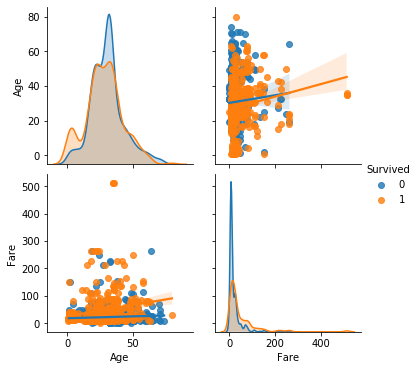

In [70]:
num_var=[feature for feature in df.columns if len(df[feature].unique())>35]
sn.pairplot(vars=num_var,kind='reg',data=df,hue='Survived')

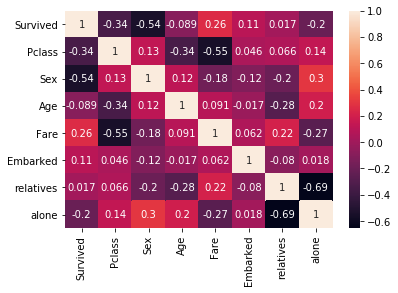

# Box plot

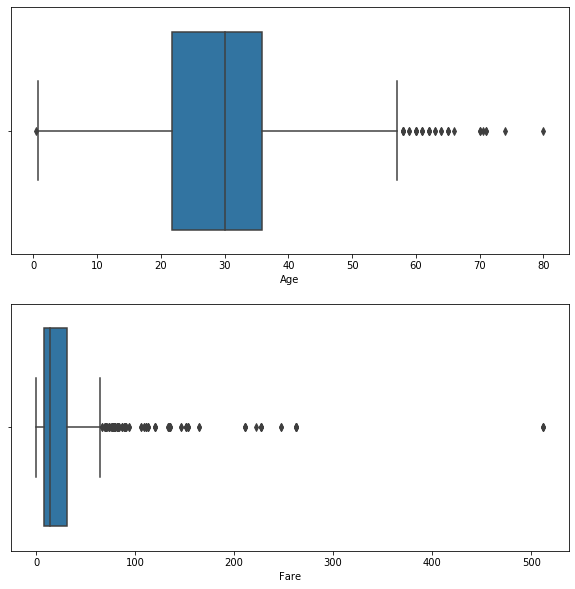

In [77]:
f,ax=plt.subplots(nrows=2,ncols=1,figsize=(10,10))
sn.boxplot('Age',data=df,ax=ax[0])
sn.boxplot('Fare',data=df,ax=ax[1])
plt.show()

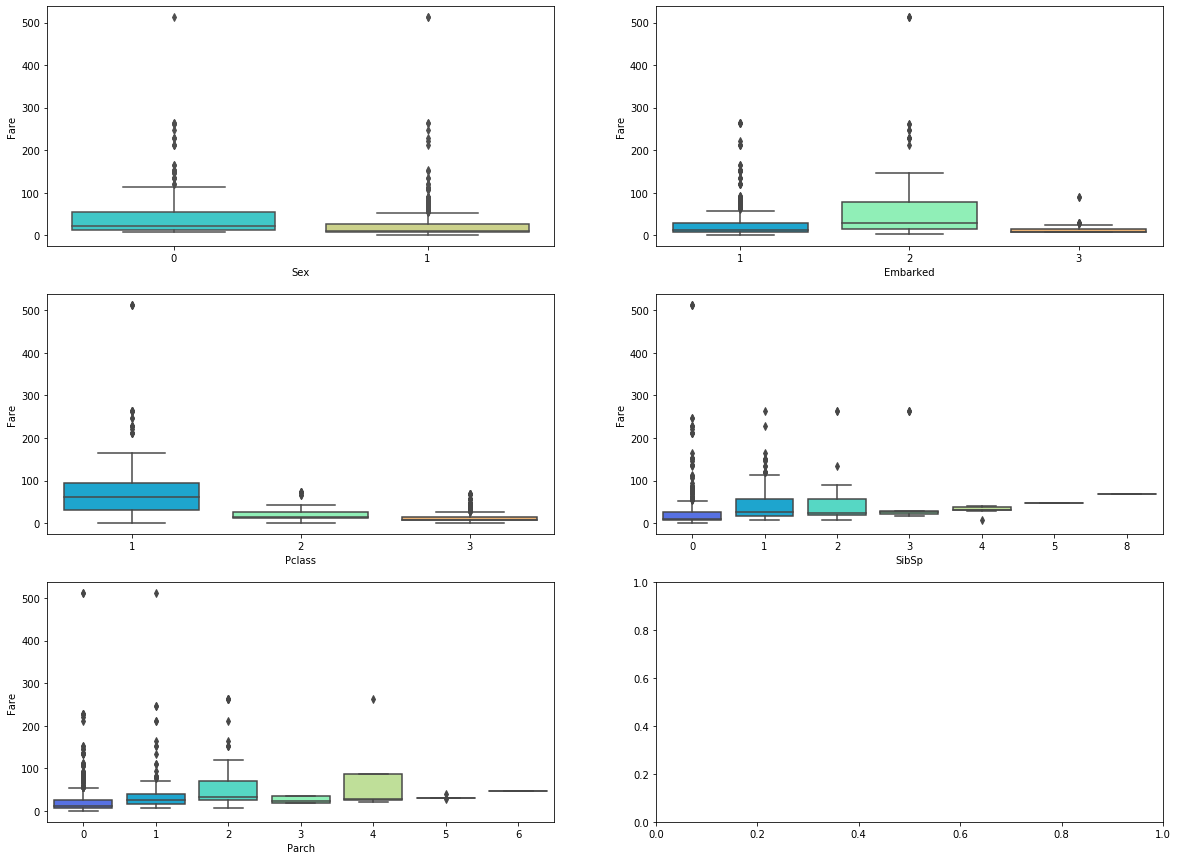

In [86]:
f,ax=plt.subplots(nrows=3,ncols=2,figsize=(20,15))
sn.boxplot('Sex','Fare',ax=ax[0,0],data=df,palette='rainbow')
sn.boxplot('Embarked','Fare',ax=ax[0,1],data=df,palette='rainbow')
sn.boxplot('Pclass','Fare',ax=ax[1,0],data=df,palette='rainbow')
sn.boxplot('SibSp','Fare',ax=ax[1,1],data=df,palette='rainbow')
sn.boxplot('Parch','Fare',ax=ax[2,0],data=df,palette='rainbow')
plt.show()

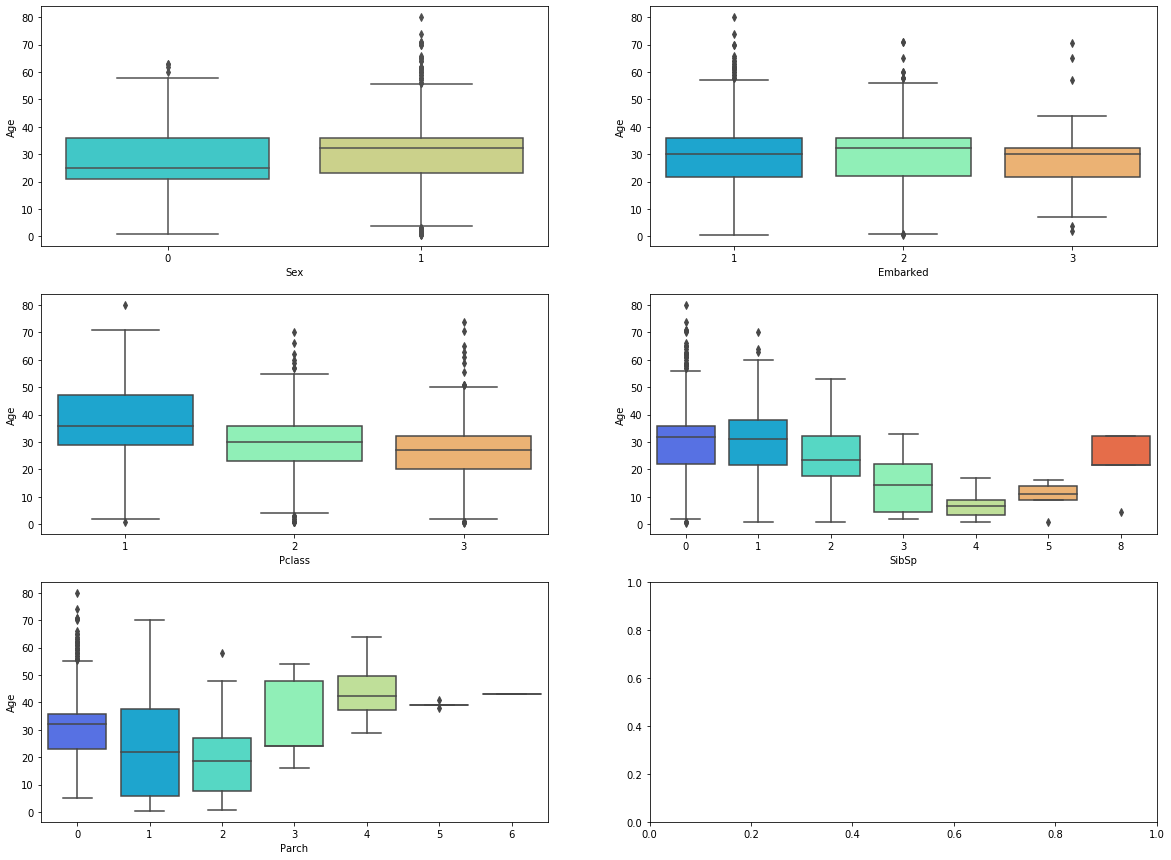

In [87]:
f,ax=plt.subplots(nrows=3,ncols=2,figsize=(20,15))
sn.boxplot('Sex','Age',ax=ax[0,0],data=df,palette='rainbow')
sn.boxplot('Embarked','Age',ax=ax[0,1],data=df,palette='rainbow')
sn.boxplot('Pclass','Age',ax=ax[1,0],data=df,palette='rainbow')
sn.boxplot('SibSp','Age',ax=ax[1,1],data=df,palette='rainbow')
sn.boxplot('Parch','Age',ax=ax[2,0],data=df,palette='rainbow')
plt.show()

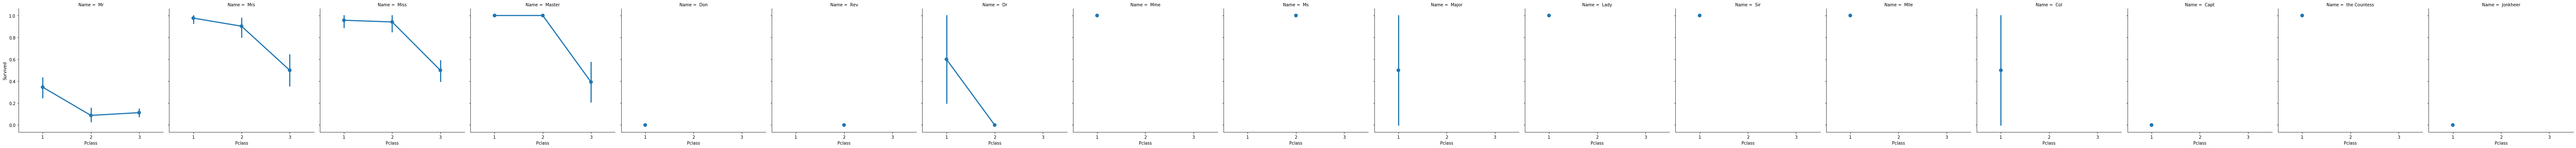

In [93]:
sn.factorplot('Pclass','Survived',col='Name',data=df)

In [14]:
df['Name'].unique()

array([' Mr', ' Mrs', ' Miss', ' Master', ' Don', ' Rev', ' Dr', ' Mme',
       ' Ms', ' Major', ' Lady', ' Sir', ' Mlle', ' Col', ' Capt',
       ' the Countess', ' Jonkheer'], dtype=object)

In [404]:
#It seems that the people who have embarked from C i.e 2 have survived more than S i.e 1 and Q i.e 3
#so order of priority will be 1)C  2)Q  3)S


C:\Users\djroc\anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\djroc\anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\djroc\anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.wa

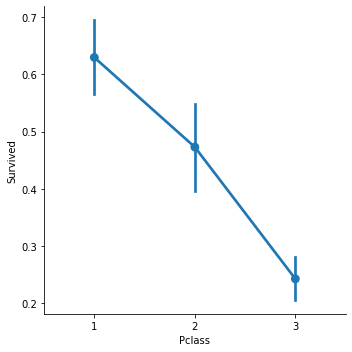

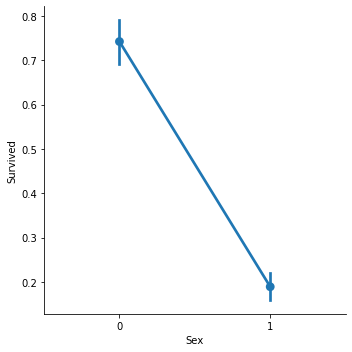

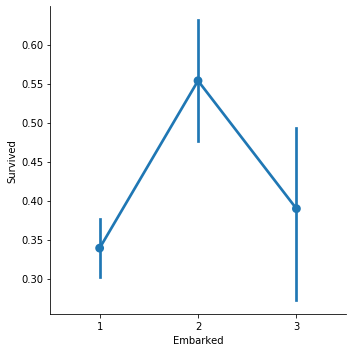

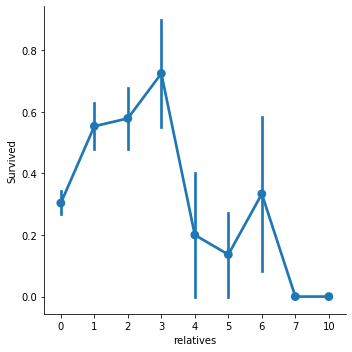

In [166]:
cat_var=[feature for feature in df.columns if len(df[feature].unique())<12]
cat_var.remove('Survived')
for feature in cat_var:
    sn.factorplot(feature,'Survived',data=df)

C:\Users\djroc\anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\djroc\anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\djroc\anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.wa

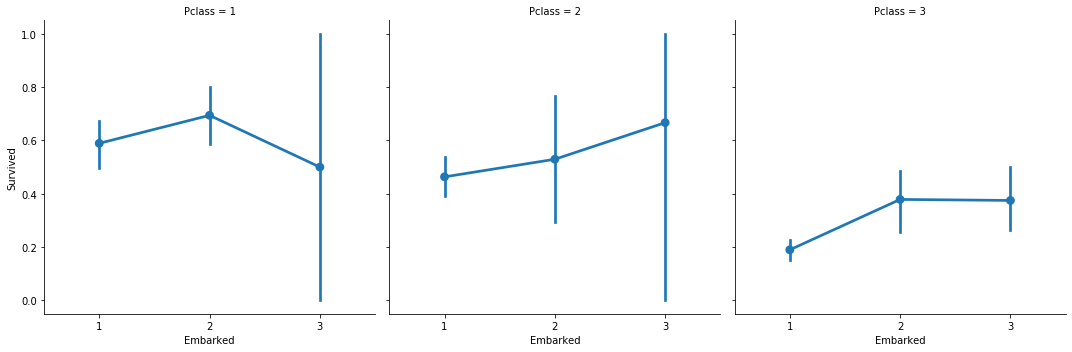

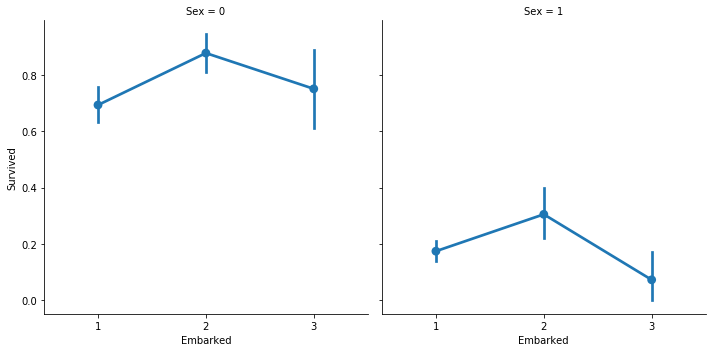

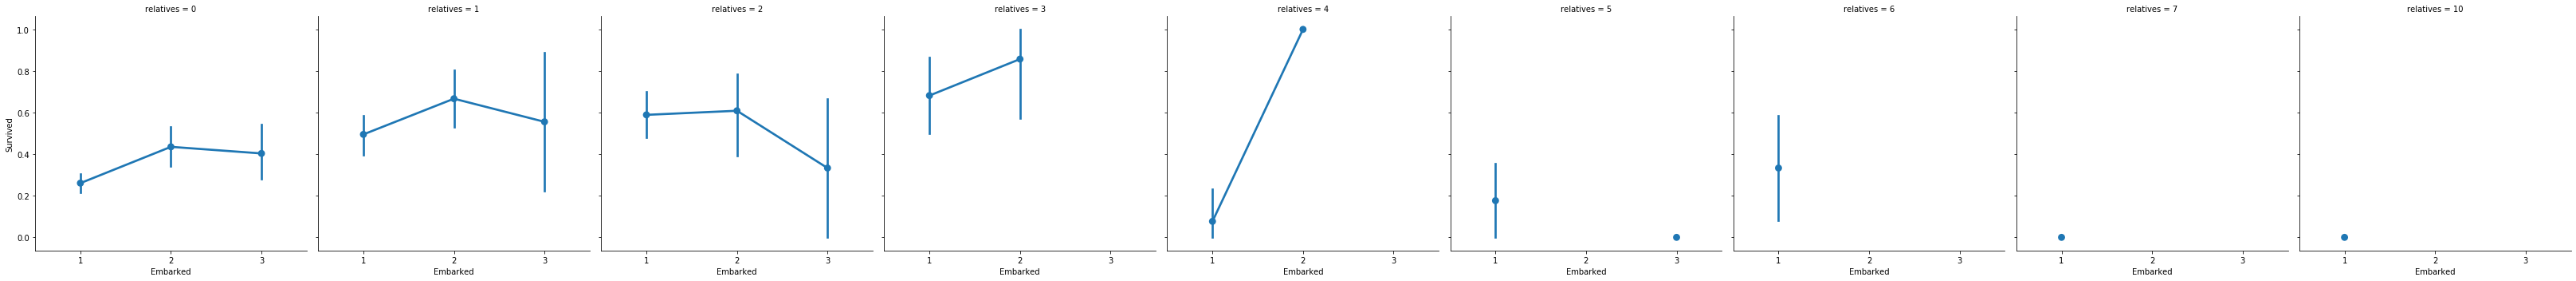

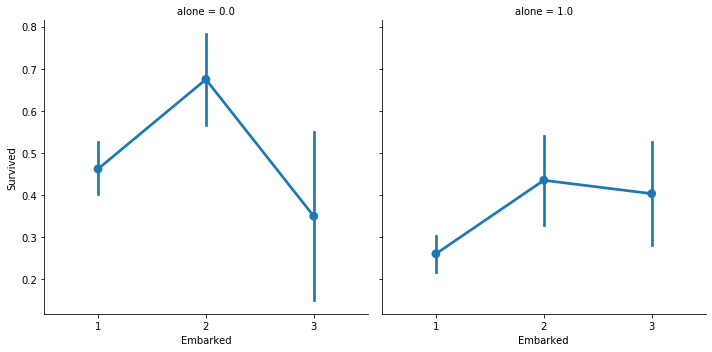

In [436]:
for feature in cat_var:
    if feature not in ['Embarked']:
        sn.factorplot('Embarked','Survived',col=feature,data=df)

C:\Users\djroc\anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\djroc\anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\djroc\anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.wa

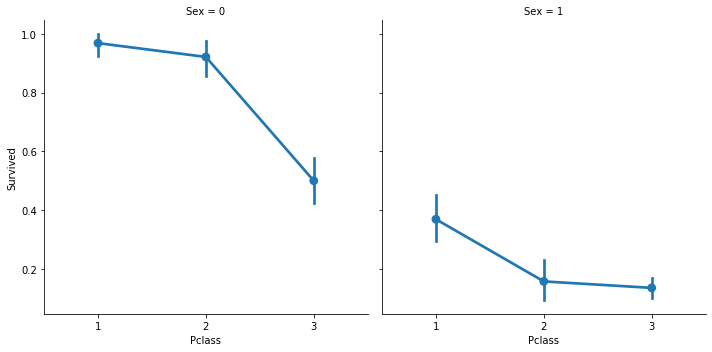

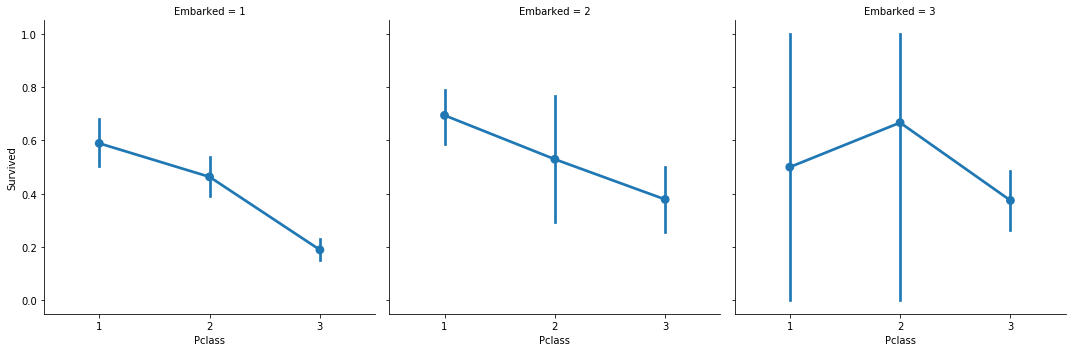

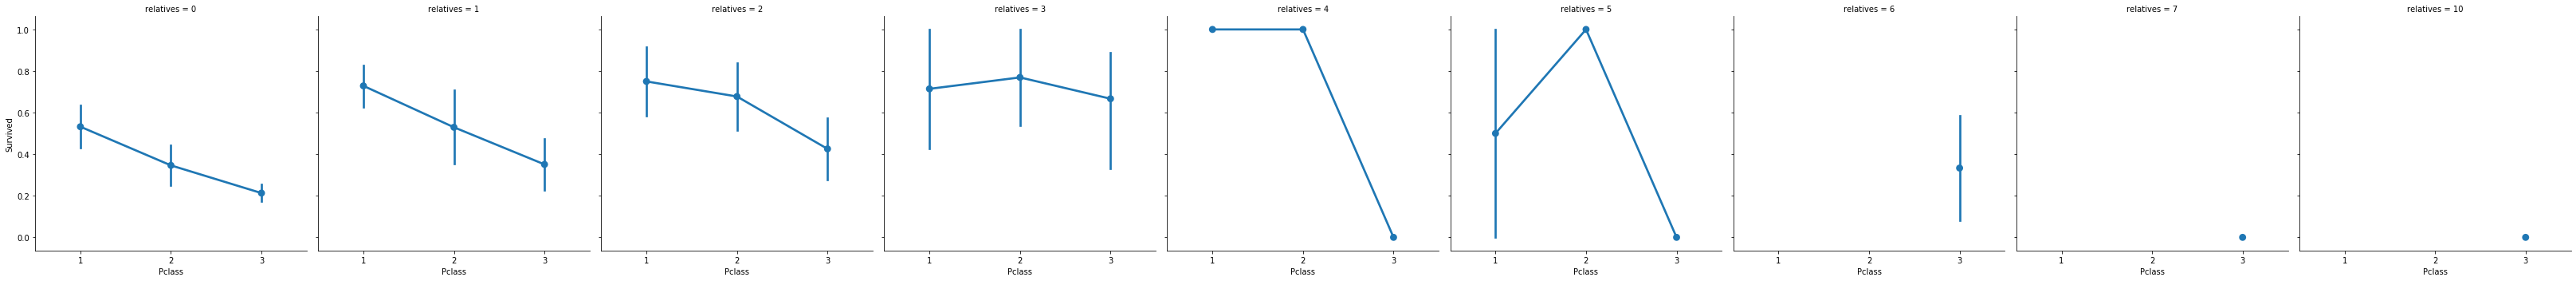

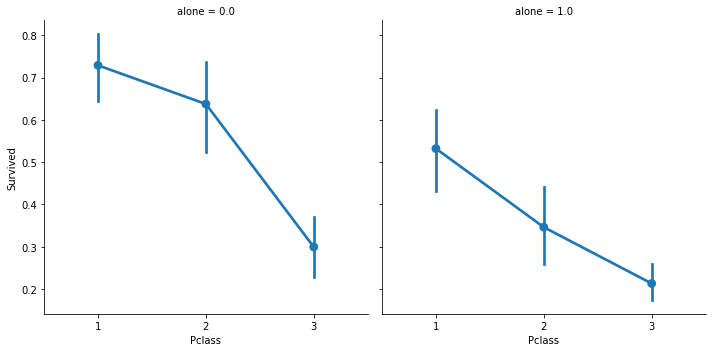

In [405]:
for feature in cat_var:
    if feature not in ['Pclass']:
        sn.factorplot('Pclass','Survived',col=feature,data=df)

C:\Users\djroc\anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\djroc\anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\djroc\anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.wa

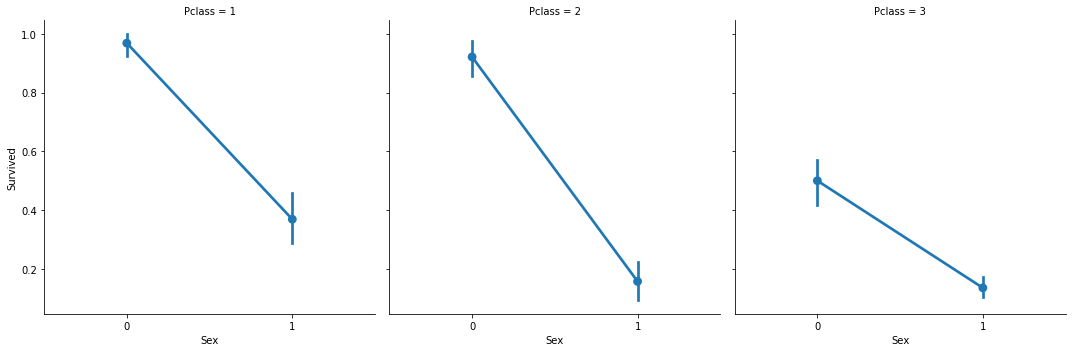

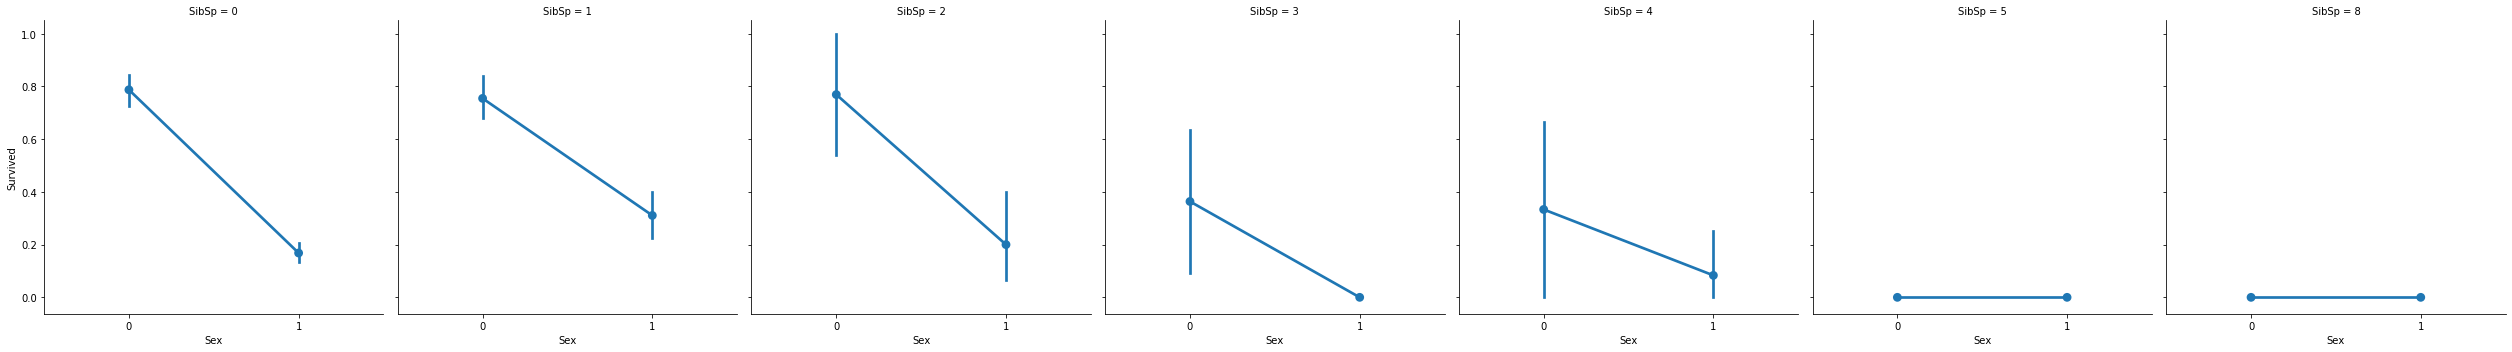

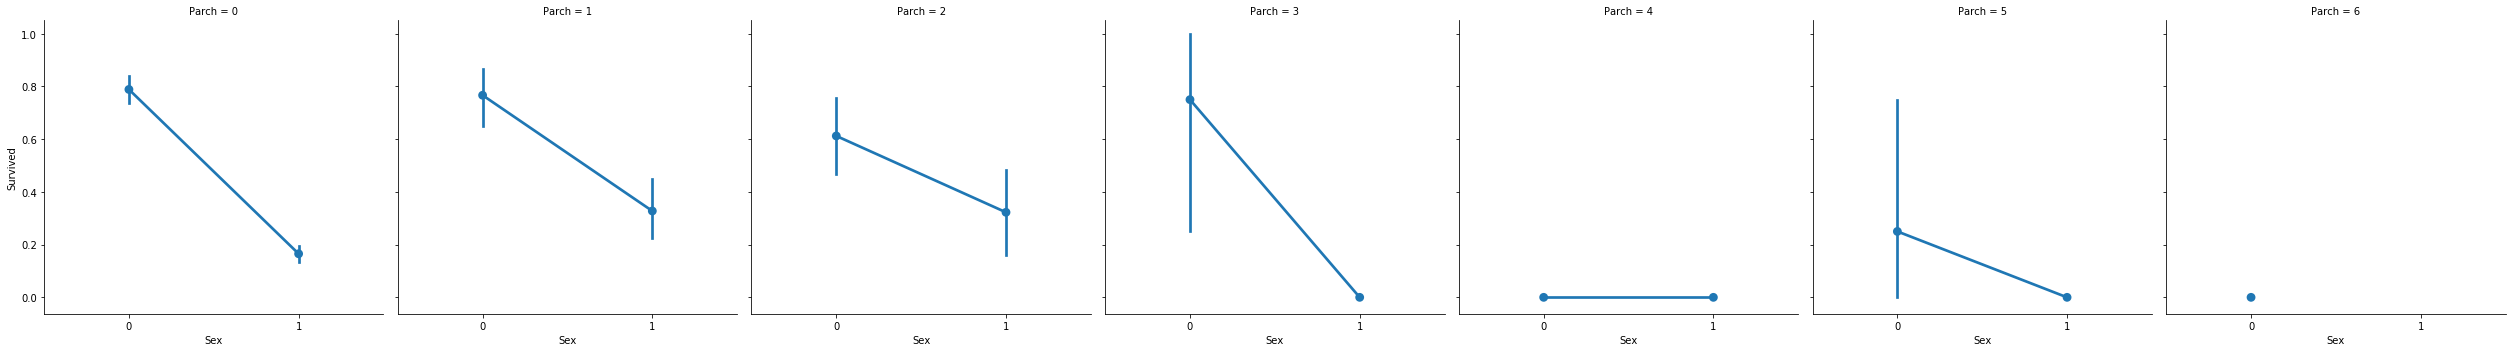

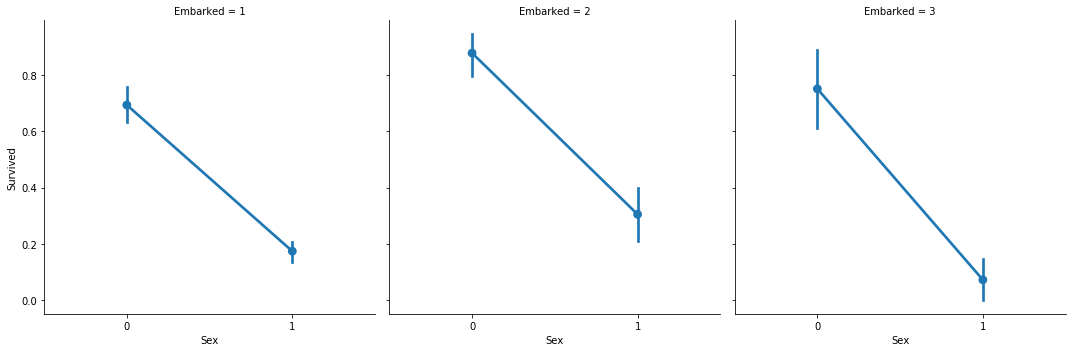

In [125]:
for feature in cat_var:
    if feature not in ['Sex']:
        sn.factorplot('Sex','Survived',col=feature,data=df)

C:\Users\djroc\anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


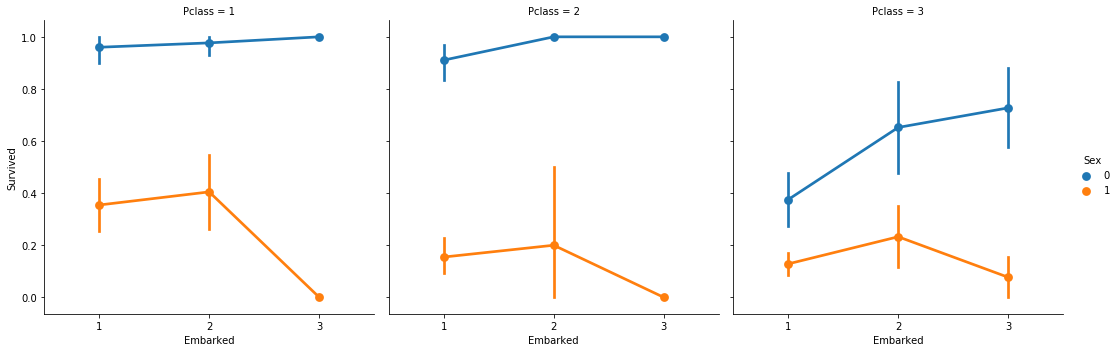

In [406]:
sn.factorplot('Embarked','Survived',col='Pclass',hue='Sex',data=df)

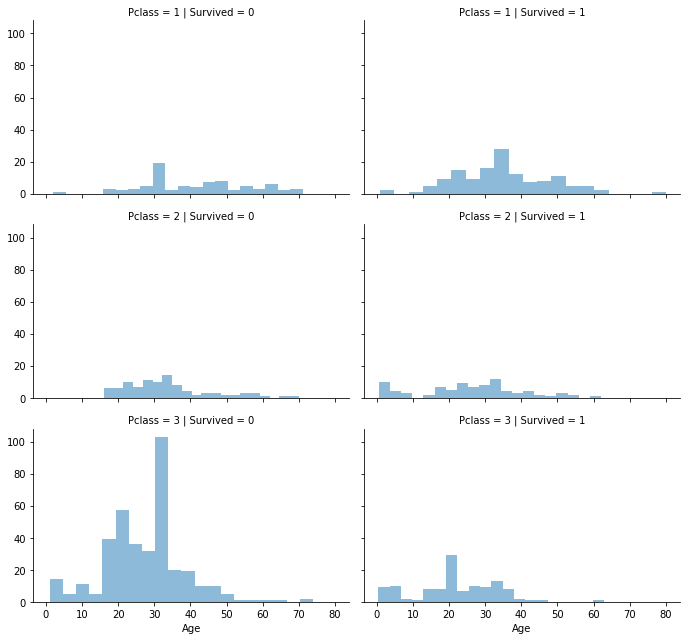

In [424]:
grid=sn.FacetGrid(df,col='Survived',row='Pclass',aspect=1.6)
grid.map(plt.hist,'Age',bins=20,alpha=0.5)
grid.add_legend()

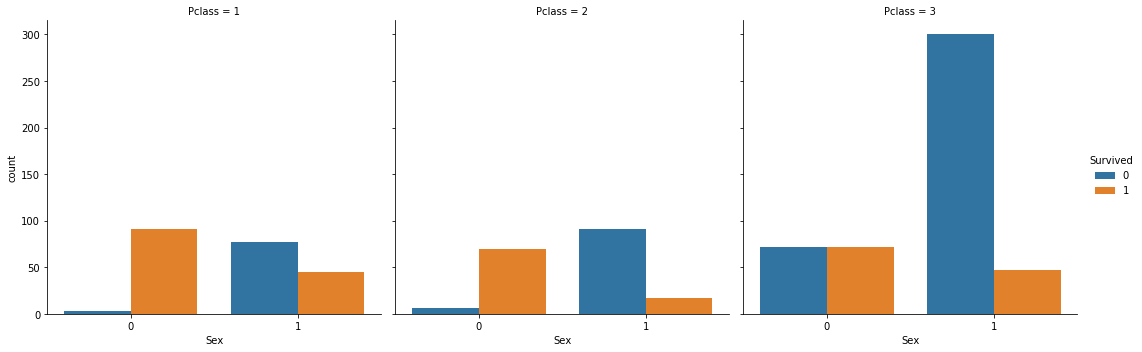

In [417]:
sn.catplot(x='Sex',col='Pclass',hue='Survived',data=df,kind='count')

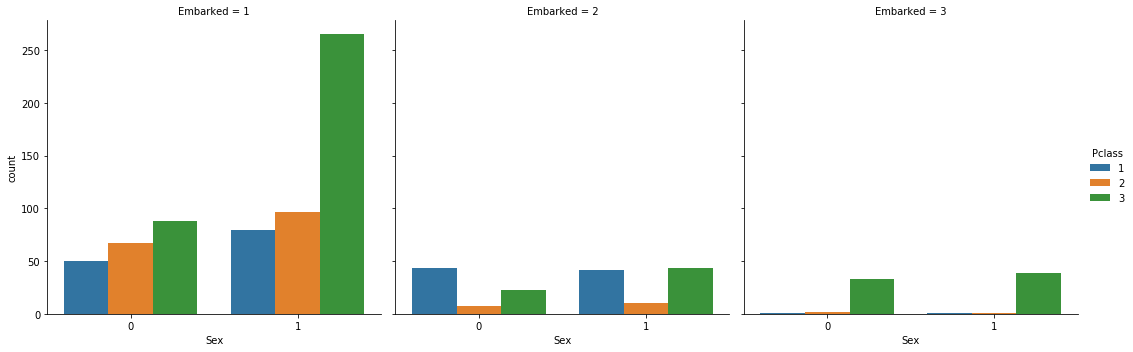

In [384]:
sn.catplot(x ='Sex', hue ='Pclass',  
kind ='count', col ='Embarked', data = df)

In [402]:
cat_var.append('alone')

In [399]:
df[df['Sex']==1][df['Embarked']==3][df['Pclass']==3].Sex.count()

C:\Users\djroc\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


39

C:\Users\djroc\anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


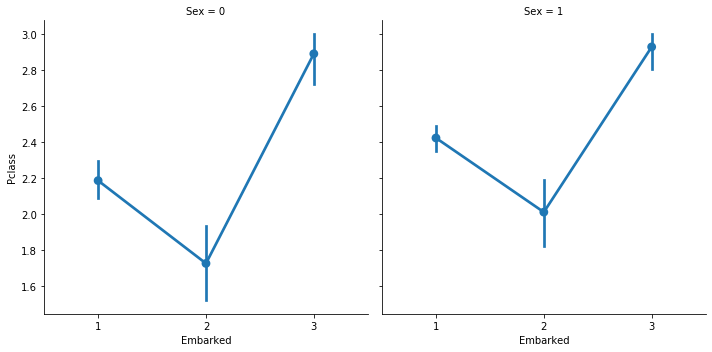

In [381]:
sn.factorplot(y ='Pclass',x='Embarked',col='Sex', data = df)

C:\Users\djroc\anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


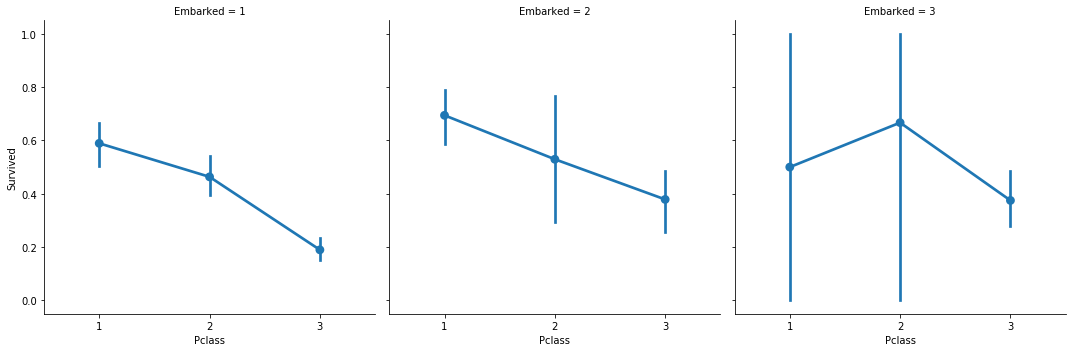

In [338]:
sn.factorplot('Pclass','Survived',col='Embarked',data=df)

C:\Users\djroc\anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


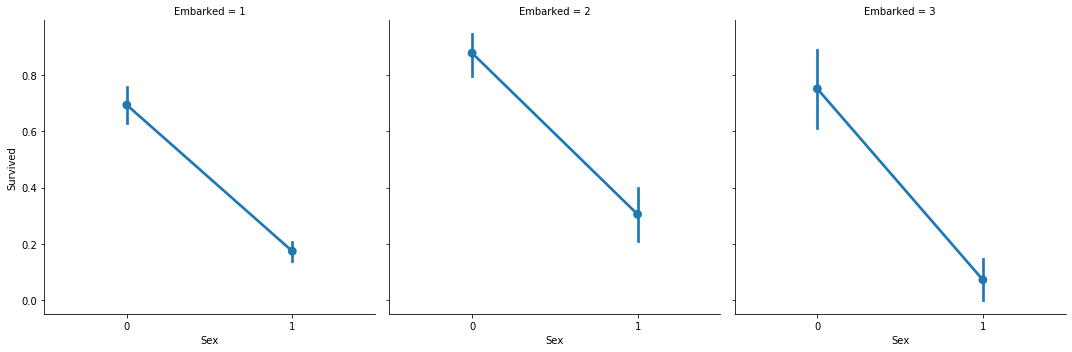

In [339]:
sn.factorplot('Sex','Survived',col='Embarked',data=df)

C:\Users\djroc\anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


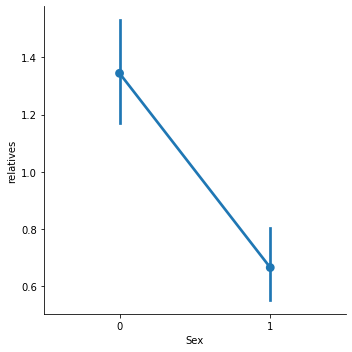

In [282]:
sn.factorplot(x='Sex',y='relatives',data=df)

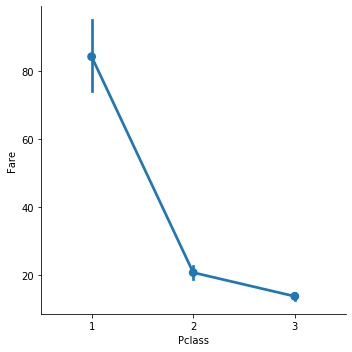

In [78]:
#As fare price is directly propotional to Pclass so more the fare more rate of survival
sn.factorplot(x='Pclass',y='Fare',data=df)

C:\Users\djroc\anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


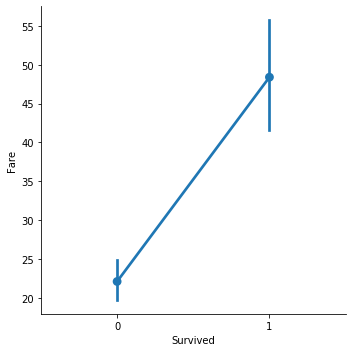

In [93]:
sn.factorplot(y='Fare',x='Survived',data=df)

In [45]:
df['relatives']=df['Parch']+df['SibSp']
df.loc[df.relatives==0,'alone']=1
df.loc[df.relatives>0,'alone']=0

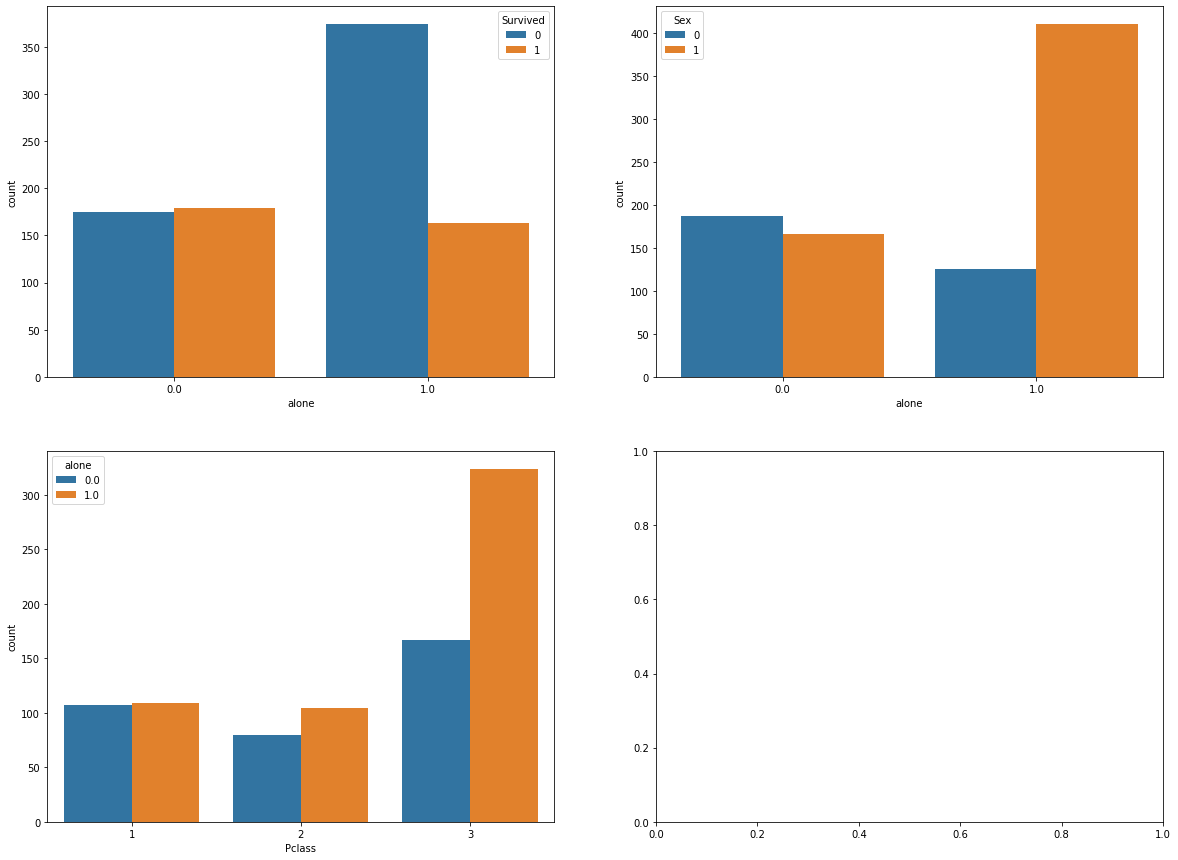

In [277]:
f,ax=plt.subplots(nrows=2,ncols=2,figsize=(20,15))
sn.countplot(x='alone',hue='Survived',data=df,ax=ax[0,0])
sn.countplot(x='alone',hue='Sex',data=df,ax=ax[0,1])
sn.countplot(x='Pclass',hue='alone',data=df,ax=ax[1,0])

C:\Users\djroc\anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


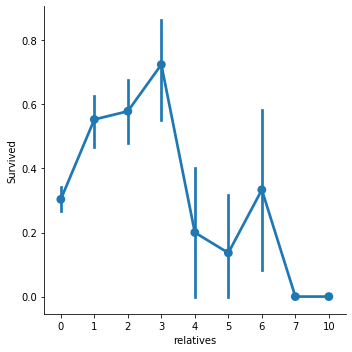

In [113]:
#If a person is having 1-3 relative then its chances of survival is more
sn.factorplot(x='relatives',y='Survived',data=df)

C:\Users\djroc\anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


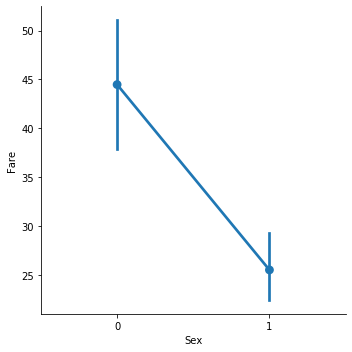

In [115]:
sn.factorplot(x='Sex',y='Fare',data=df)

In [144]:
for i in range(1,70,20):
    x=(((df[df['Age']>i].Fare.sum())-(df[df['Age']>i+20].Fare.sum()))/df.Fare.sum())*100
    print('{}-{}:{}'.format(i,i+20,x))

1-21:20.084925709407315
21-41:56.970049779798
41-61:18.383144978931153
61-81:2.9208541188856145


C:\Users\djroc\anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


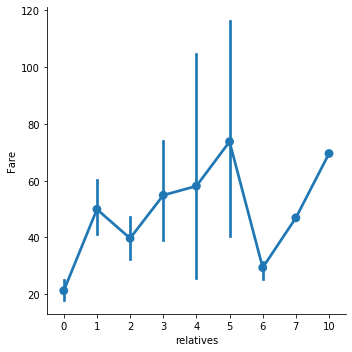

In [145]:
sn.factorplot(x='relatives',y='Fare',data=df)

In [ ]:

df.drop(['SibSp', 'Parch'],inplace=True,axis=1)

C:\Users\djroc\anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


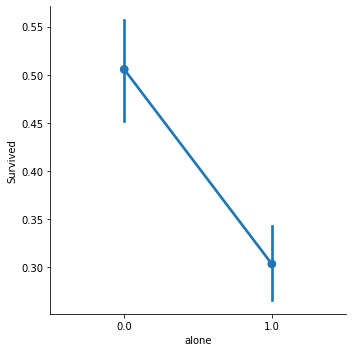

In [276]:
sn.factorplot(x='alone',y='Survived',data=df)

C:\Users\djroc\anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


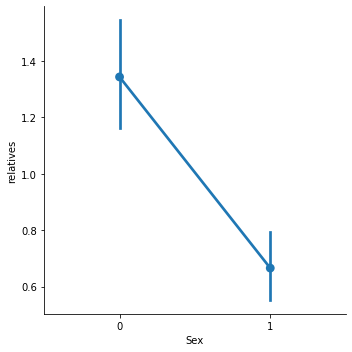

In [280]:
sn.factorplot(x='Sex',y='relatives',data=df)

C:\Users\djroc\anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\djroc\anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\djroc\anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.wa

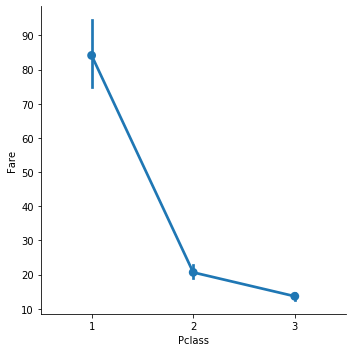

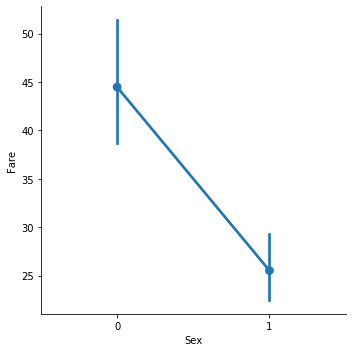

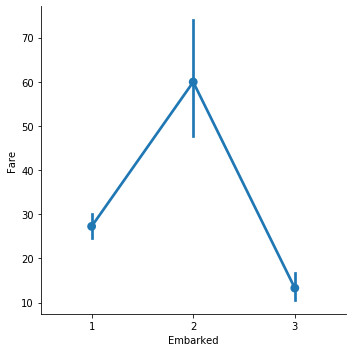

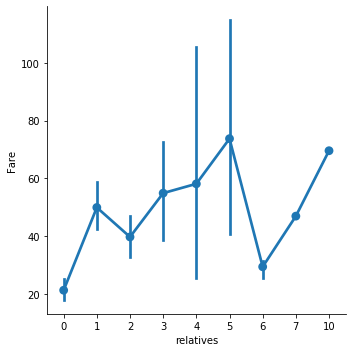

In [164]:
cat_var.remove('Parch')
cat_var.remove('SibSp')
for i in  cat_var:
    sn.factorplot(x=i,y='Fare',data=df)

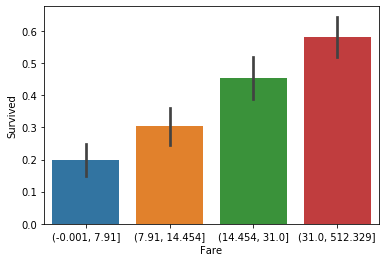

In [257]:
x=pd.qcut(df.Fare,4)
sn.barplot(x=x,y='Survived',data=df)

In [ ]:
x=pd.qcut(df.Fare,4)
sn.barplot(x=x,y='Survived',data=df)

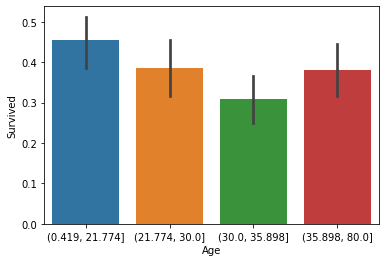

In [266]:
x=pd.qcut(df.Age,4)
sn.barplot(x=x,y='Survived',data=df)

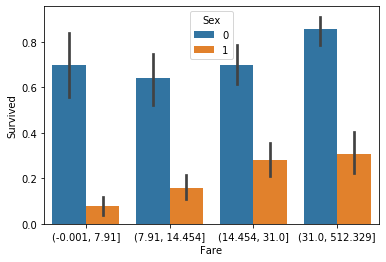

In [264]:
x=pd.qcut(df.Fare,4)
sn.barplot(x=x,y='Survived',data=df,hue='Sex')

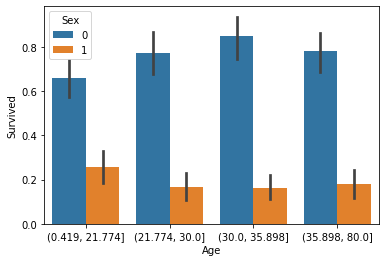

In [265]:

x=pd.qcut(df.Age,4)
sn.barplot(x=x,y='Survived',data=df,hue='Sex')

C:\Users\djroc\anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.


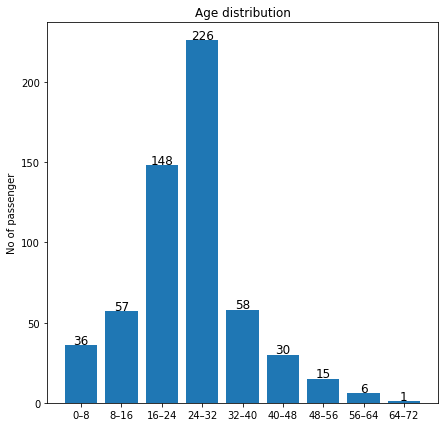

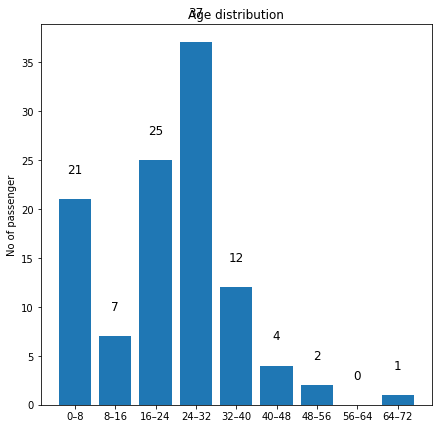

In [434]:
ages_hist = np.histogram(df[df['Sex']==1].Age, bins=[0,10,20,30,40,50,60,70,80,90])
ages_hist_labels = ['0–8', '8–16', '16–24', '24–32', '32–40', '40–48', '48–56', '56–64', '64–72']
plt.figure(figsize=(7,7))
plt.title('Age distribution')
plt.bar(ages_hist_labels, ages_hist[0])
plt.ylabel('No of passenger')
for i, bin in zip(ages_hist[0], range(9)):
    plt.text(bin, i+3, str(int(i)), fontsize=12,
             horizontalalignment='center', verticalalignment='center')
ages_hist = np.histogram(df[df['Sex']==1][df['Survived']==1].Age, bins=[0,10,20,30,40,50,60,70,80,90])
ages_hist_labels = ['0–8', '8–16', '16–24', '24–32', '32–40', '40–48', '48–56', '56–64', '64–72']
plt.figure(figsize=(7,7))
plt.title('Age distribution')
plt.bar(ages_hist_labels, ages_hist[0])
plt.ylabel('No of passenger')
for i, bin in zip(ages_hist[0], range(9)):
    plt.text(bin, i+3, str(int(i)), fontsize=12,
             horizontalalignment='center', verticalalignment='center')
plt.show()

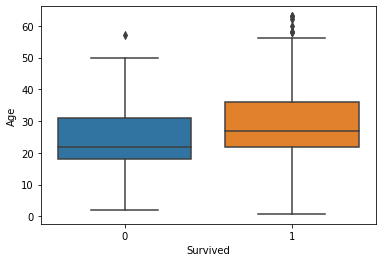

In [229]:
x=df[df['Sex']==0].Age
sn.boxplot('Survived',x,data=df)

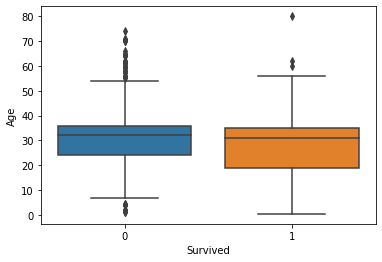

In [230]:
x=df[df['Sex']==1].Age
sn.boxplot('Survived',x,data=df)

In [235]:
df[df['Sex']==0][df['Survived']==1].Age.describe()

C:\Users\djroc\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


count    233.000000
mean      28.603440
std       13.320592
min        0.750000
25%       21.773973
50%       27.000000
75%       35.898148
max       63.000000
Name: Age, dtype: float64

In [236]:
x=pd.qcut(df.Fare,4)

In [251]:
df[df['Sex']==1][df['Survived']==1].Age.describe()

C:\Users\djroc\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


count    109.000000
mean      27.513501
std       15.649279
min        0.420000
25%       19.000000
50%       31.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [253]:
df[df['Sex']==1][df['Survived']==1].Fare.describe()

C:\Users\djroc\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


count    109.000000
mean      40.821484
std       71.355967
min        0.000000
25%        9.500000
50%       26.287500
75%       39.000000
max      512.329200
Name: Fare, dtype: float64

C:\Users\djroc\anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


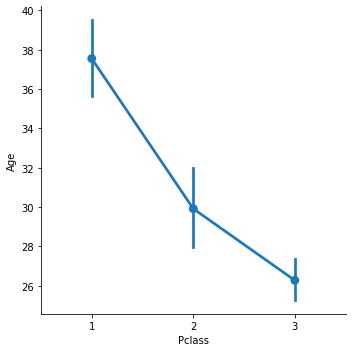

In [302]:
sn.factorplot('Pclass','Age',data=df)

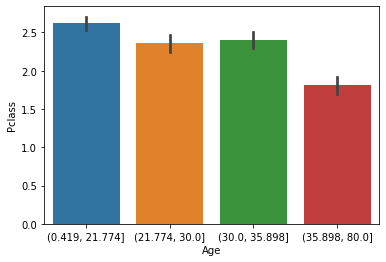

In [304]:
x=pd.qcut(df.Age,4)
sn.barplot(x=x,y='Pclass',data=df)

C:\Users\djroc\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


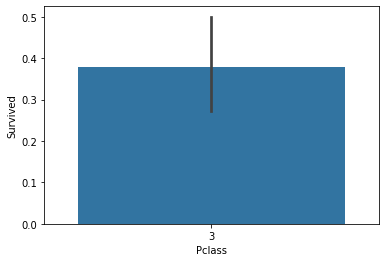

In [316]:
sn.barplot(df[df['Embarked']==2][df['Pclass']==3].Pclass,y='Survived',data=df)

In [336]:
df[df['Embarked']==1][df['Survived']==1][df['Pclass']==2].Pclass.count()

C:\Users\djroc\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


76

In [15]:
df.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,Mr,1,22.0,1,0,7.2500,1
1,1,1,Mrs,0,38.0,1,0,71.2833,2
2,1,3,Miss,0,26.0,0,0,7.9250,1
3,1,1,Mrs,0,35.0,1,0,53.1000,1
4,0,3,Mr,1,35.0,0,0,8.0500,1


In [19]:
df['Sex']=df['Sex'].astype(object)
df['Embarked']=df['Embarked'].astype(object)
df['Pclass']=df['Pclass'].astype(object)


In [47]:
df.drop(['Name','SibSp','Parch'],inplace=True,axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   891 non-null    int64  
 1   Pclass     891 non-null    int64  
 2   Sex        891 non-null    object 
 3   Age        891 non-null    float64
 4   Fare       891 non-null    float64
 5   Embarked   891 non-null    object 
 6   relatives  891 non-null    int64  
 7   alone      891 non-null    float64
dtypes: float64(3), int64(3), object(2)
memory usage: 55.8+ KB


In [48]:
df=pd.get_dummies(data=df,columns=['Sex','Pclass','Embarked','alone'],drop_first=True)

In [73]:
df[0:5]

,Age,Fare,relatives,Sex_male,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,alone_1.0
0,22.0,7.2500,1,1,0,1,0,1,0
1,38.0,71.2833,1,0,0,0,0,0,0
2,26.0,7.9250,0,0,0,1,0,1,1
3,35.0,53.1000,1,0,0,0,0,1,0
4,35.0,8.0500,0,1,0,1,0,1,1


In [51]:
y=df['Survived']
df.drop('Survived',inplace=True,axis=1)
x=df

In [53]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y,train_size=0.8,random_state=100)

In [105]:
            from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(train_x,train_y)

C:\Users\djroc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [106]:
pred=lr.predict_proba(test_x)
pred=pd.DataFrame(pred[:,1])
print('Logistic test roc-auc: {}'.format(metrics.roc_auc_score(test_y,pred)))

Logistic test roc-auc: 0.8369871794871795


In [107]:
from sklearn import metrics
fpr,tpr,thresholds=metrics.roc_curve(test_y,pred)
thresholds

array([1.9773593 , 0.9773593 , 0.88901607, 0.87854962, 0.85008508,
       0.84990203, 0.81121316, 0.80569207, 0.79810171, 0.79179881,
       0.74262853, 0.73388799, 0.72510264, 0.72244434, 0.69130597,
       0.66665851, 0.66655032, 0.63475269, 0.63283654, 0.6224148 ,
       0.61473813, 0.61242659, 0.59734442, 0.55392118, 0.54499995,
       0.46064058, 0.41225886, 0.39308371, 0.34417957, 0.33647432,
       0.32903935, 0.3183003 , 0.29705776, 0.28382237, 0.24319231,
       0.24107312, 0.17780475, 0.16449767, 0.15154946, 0.14916188,
       0.13496747, 0.13461654, 0.13429256, 0.13165146, 0.11671662,
       0.11669394, 0.10840568, 0.10303203, 0.09729587, 0.09415917,
       0.09415515, 0.09401835, 0.09377258, 0.09374056, 0.09086216,
       0.09077493, 0.09033313, 0.08754925, 0.08131702, 0.07782978,
       0.07691202, 0.07679262, 0.07675144, 0.07297205, 0.00295207])

In [98]:
from sklearn.metrics import accuracy_score
accuracy_ls = []
for thres in thresholds:
    pred = np.where(pred>thres,1,0)
    accuracy_ls.append(accuracy_score(test_y,pred, normalize=True))
    
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)],
                        axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls.head()

,thresholds,accuracy
0,1.977359,0.581006
33,0.283822,0.581006
35,0.241073,0.581006
36,0.177805,0.581006
37,0.164498,0.581006


In [99]:
pred_lr = np.where(pred>0.581006,1,0)

In [100]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_y, pred_lr)

array([[104,   0],
       [ 75,   0]], dtype=int64)

In [102]:
print(metrics.classification_report(test_y,pred_lr))

              precision    recall  f1-score   support

           0       0.58      1.00      0.73       104
           1       0.00      0.00      0.00        75

    accuracy                           0.58       179
   macro avg       0.29      0.50      0.37       179
weighted avg       0.34      0.58      0.43       179



C:\Users\djroc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\djroc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\djroc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [81]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

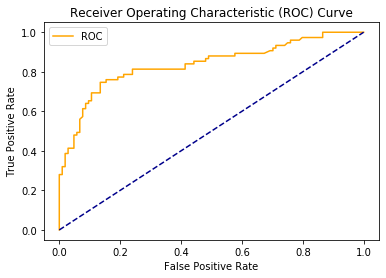

In [82]:
plot_roc_curve(fpr,tpr)

In [87]:
from sklearn.ensemble import AdaBoostClassifier
ada_classifier=AdaBoostClassifier()
ada_classifier.fit(train_x, train_y)
ytrain_pred = ada_classifier.predict_proba(train_x)
print('Adaboost train roc-auc: {}'.format(metrics.roc_auc_score(train_y, ytrain_pred[:,1])))
ytest_pred = ada_classifier.predict_proba(test_x)
print('Adaboost test roc-auc: {}'.format(metrics.roc_auc_score(test_y, ytest_pred[:,1])))

Adaboost train roc-auc: 0.9108782561124436
Adaboost test roc-auc: 0.8363461538461539
